In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

# Baseline t-SNE (t-Distributed Stochastic Neighbor Embedding) on Error Data

In [13]:
# read data
PATH = "../../my_data/identification-dataset/my_custom_data/error-identification-dataset.csv"
df = pd.read_csv(PATH)

In [14]:
# drop uncomplete rows
df.dropna(inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59871 entries, 0 to 59870
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tdoa12            59871 non-null  float64
 1   tdoa21            59871 non-null  float64
 2   snr_an1           59871 non-null  float64
 3   power_dif_an1     59871 non-null  float64
 4   snr_an2           59871 non-null  float64
 5   power_dif_an2     59871 non-null  float64
 6   an1_rx_snr        59871 non-null  float64
 7   an1_rx_powerdif   59871 non-null  float64
 8   an1_tof           59871 non-null  float64
 9   an2_rx_snr        59871 non-null  float64
 10  an2_rx_powerdif   59871 non-null  float64
 11  an2_tof           59871 non-null  float64
 12  material          59871 non-null  object 
 13  encoded_material  59871 non-null  int64  
 14  error             59871 non-null  float64
dtypes: float64(13), int64(1), object(1)
memory usage: 6.9+ MB


In [16]:
# drop the encoded material column
df.drop('encoded_material', axis=1, inplace=True)

In [17]:
# Extracted features 
X = df.drop('material', axis=1)
y = df['material'] # Labels

In [18]:
# Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [21]:
# Apply t-SNE to reduce the dimensions to 2D
X_embedded = TSNE(n_components=3).fit_transform(X)

/Users/bentmeemken/miniconda3/envs/dataScience/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/bentmeemken/miniconda3/envs/dataScience/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [29]:
X_embedded = pd.DataFrame(X_embedded, columns = ['Column_A','Column_B','Column_C'])

In [30]:
finalDf = pd.concat([X_embedded, y], axis = 1)

In [31]:
finalDf.head()

,Column_A,Column_B,Column_C,material
0,-9.184597,-13.534504,-0.489574,cardboard
1,-1.594104,-4.704037,-11.698933,cardboard
2,-8.887283,18.172916,9.587038,cardboard
3,-8.547505,16.595442,9.933892,cardboard
4,1.034000,-16.055386,1.843092,cardboard


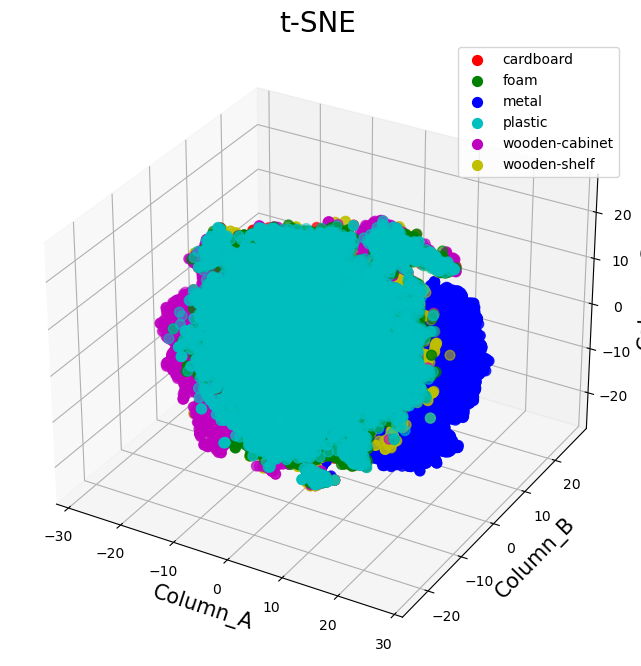

In [35]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Column_A', fontsize = 15)
ax.set_ylabel('Column_B', fontsize = 15)
ax.set_zlabel('Column_C', fontsize = 15)
ax.set_title('t-SNE', fontsize = 20)

targets = ['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet', 'wooden-shelf']
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['material'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Column_A'], 
               finalDf.loc[indicesToKeep, 'Column_B'], 
               finalDf.loc[indicesToKeep, 'Column_C'],
               c = color, s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
targets = ['cardboard', 'foam', 'metal', 'plastic', 'wooden-cabinet', 'wooden-shelf']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow']

# Create traces
data = []
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['material'] == target
    trace = go.Scatter3d(
        x=finalDf.loc[indicesToKeep, 'Column_A'],
        y=finalDf.loc[indicesToKeep, 'Column_B'],
        z=finalDf.loc[indicesToKeep, 'Column_C'],
        mode='markers',
        marker=dict(
            size=5,
            line=dict(
                color=color,
                width=0.5
            ),
            opacity=0.8
        ),
        name=target
    )
    data.append(trace)

# Layout
layout = go.Layout(
    title='t-SNE',
    scene=dict(
        xaxis_title='Column_A',
        yaxis_title='Column_B',
        zaxis_title='Column_C'
    )
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the interactive plot
fig.show()